# Sentiment Analysis Work Presentation

1. Want to analyse text. The aim is to prefilter the great masses of text (big data) and make sure the resources are being focused on high value targets.

2. The end game beign the pipeline would apply to multiple formats of text, socials, emails, news, translations etc and eventually multiple languages.

3. Can also be applied for call chaining (relationship analysis) and message chaining (same but for texts) which will increase the value of a targeted investigation at scale. (People have both malicious and non malicious relationships and the use of sentiment analysis would filter those communications and highlight the ones with malicious sentiment (similar values to the target))

4. Take the results of the call chaining and correlate them to the physical locations of people and events.

Now, it's time to have fun!

This kernal aims to:
- Obtain the data
- Clean the data so it can be analysed
- Analyse the data for 
    - Who was tweeting
    - who were they tweeting to
    - what was the sentiment of the tweet
    - filter for hostile/malicious/hate
    - establish the relationships around those people, who, where, what
    - analyse for events, intent and actions
    
- Understand the problem... check each variable and enusre the logic behind the analysis is sound and relevant.
- Univariable study. Initially focus on the dependant variable ('???!!!!????') and understand its impact and relevance.
- Multivariate study. Establish relationships between the dependent variable and independent variables.
- Initial data cleaning. Perform cleaning on the data, deal with missing data, outliers and categorical variables.
- Develop a hypothesis, establish Ho and H1. Determine the alpha. Calculate the z-test. Test assumptions. Check if our data meets the assumptions required by most multivariate techniques. Test against the hypothesis and find if the hypothesis is valid.


## Process

#### 1.Obtain tweets/text with corresponding metadata

#### 2. Analyse texts and tweets for sentiment.

#### 3. Determine which of these tend toward malicious or hostile sentiment.

#### 4. Delve into those with high corralation to hostile/malicious intent and determine other identifiers

#### 5. Identify who those identities are sending malicious/hostile communications

#### 6. Identfy metadata on the highest priority identities

#### 7. Mine the metadata for location and event correlation



## 1. Obtain tweets/text with corresponding metadata


Using https://github.com/twintproject/twint
    
    Grab location data 
    Grab data for parties such as Hammertoss (Russian apt29 use hammertoss that create a daily handle under twitter), QanonAnonymous 
    
Grab some data and save it to a .csv

Alternatively, Daniel Johnstone has written a script!

In [1]:
'''import twint # pip install this
import nest_asyncio # pip install this

nest_asyncio.apply()
c = twint.Config()
c.Username = "realDonaldTrump"
c.Count = True
c.Stats = True
c.Store_csv = True
c.Output = "./data.csv"

twint.run.Search(c)'''

'import twint # pip install this\nimport nest_asyncio # pip install this\n\nnest_asyncio.apply()\nc = twint.Config()\nc.Username = "realDonaldTrump"\nc.Count = True\nc.Stats = True\nc.Store_csv = True\nc.Output = "./data.csv"\n\ntwint.run.Search(c)'

## Preprocessing and DataCleaning


Do some initial cleaning and exploration of the data

In [2]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string

import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Lets import the datasets that have (hopefully) been uploaded to the python data folder

In [3]:
df  = pd.read_csv('data/London1Tweet10kIMPORT.csv')


### Data Inspection

First up, have a look at the data and see if it meets expectations...

In [4]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.443740e+18,1.443740e+18,2021-10-01 11:06:23 AUS Eastern Standard Time,1/10/2021,11:06:23 AM,1000,1.252941e+09,nahhhman,NAOman ðŸš·,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'itismedaphne', 'name': 'Daphne Soup ðŸ¥£', 'id': '825837098401869824'}, {'screen_name': 'eikuobaj', 'name': 'Eikuobaj.', 'id': '1206478527530487808'}]",NaN,NaN,NaN,NaN
1,1.443740e+18,1.443730e+18,2021-10-01 11:06:21 AUS Eastern Standard Time,1/10/2021,11:06:21 AM,1000,1.115210e+18,matthew83862519,Matty,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'SeoirseDuffy_', 'name': 'SeÃ³irse Duffy', 'id': '2867040495'}]",NaN,NaN,NaN,NaN
2,1.443740e+18,1.443740e+18,2021-10-01 11:06:21 AUS Eastern Standard Time,1/10/2021,11:06:21 AM,1000,1.206600e+18,mohsadiq16,Mohammed Sadiq,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.443740e+18,1.443700e+18,2021-10-01 11:06:21 AUS Eastern Standard Time,1/10/2021,11:06:21 AM,1000,1.668494e+09,naseem028,Naseem,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'AnnetteReid247', 'name': 'G131 | ðŸªðŸ’œðŸ™ | ì—‘ì†Œ', 'id': '1226732127573729281'}]",NaN,NaN,NaN,NaN
4,1.443740e+18,1.443740e+18,2021-10-01 11:06:21 AUS Eastern Standard Time,1/10/2021,11:06:21 AM,1000,1.929937e+08,alexlepretre,Alexandre LeprÃªtre,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'Loco_LFC', 'name': 'ðŸ’ŽLocoðŸ™ŒðŸ½', 'id': '68214405'}, {'screen_name': 'DanPriceSeattle', 'name': 'Dan Price', 'id': '2172596028'}]",NaN,NaN,NaN,NaN


In [5]:
df.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
40400,1.443710e+18,1.443340e+18,2021-10-01 08:32:10 AUS Eastern Standard Time,1/10/2021,8:32:10 AM,1000,3.350379e+09,n_nationalism,Nations & Nationalism,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'TedBey', 'name': 'Ted Bey', 'id': '1233412500'}, {'screen_name': 'EZuelow', 'name': 'Eric G. E. Zuelow', 'id': '2710417418'}]",NaN,NaN,NaN,NaN
40401,1.443710e+18,1.443710e+18,2021-10-01 08:32:09 AUS Eastern Standard Time,1/10/2021,8:32:09 AM,1000,1.864407e+09,khloekleo,ChloÃ©,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40402,1.443710e+18,1.443710e+18,2021-10-01 08:32:09 AUS Eastern Standard Time,1/10/2021,8:32:09 AM,1000,2.062304e+08,mickiano,ðŸ Project BabyÂ®,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40403,1.443710e+18,1.443710e+18,2021-10-01 08:32:09 AUS Eastern Standard Time,1/10/2021,8:32:09 AM,1000,2.167959e+08,pcrepairsc,PC Repairs Croydon Ltd.,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
40404,1.443710e+18,1.443710e+18,2021-10-01 08:32:09 AUS Eastern Standard Time,1/10/2021,8:32:09 AM,1000,1.323200e+18,ahmad_hk10,Ahmad.HKðŸ´ó §ó ¢ó ¥ó ®ó §ó ¿,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


check for NaN and na in the dataset.

At the moment, just checking to see if there is geolocations for each tweet.

In [6]:
na_df = df[df['geo'].isna()]
na_df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


In [7]:
na_df = df[df['geo'].notna()]
na_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.443740e+18,1.443740e+18,2021-10-01 11:06:23 AUS Eastern Standard Time,1/10/2021,11:06:23 AM,1000,1.252941e+09,nahhhman,NAOman ðŸš·,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'itismedaphne', 'name': 'Daphne Soup ðŸ¥£', 'id': '825837098401869824'}, {'screen_name': 'eikuobaj', 'name': 'Eikuobaj.', 'id': '1206478527530487808'}]",NaN,NaN,NaN,NaN
1,1.443740e+18,1.443730e+18,2021-10-01 11:06:21 AUS Eastern Standard Time,1/10/2021,11:06:21 AM,1000,1.115210e+18,matthew83862519,Matty,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'SeoirseDuffy_', 'name': 'SeÃ³irse Duffy', 'id': '2867040495'}]",NaN,NaN,NaN,NaN
2,1.443740e+18,1.443740e+18,2021-10-01 11:06:21 AUS Eastern Standard Time,1/10/2021,11:06:21 AM,1000,1.206600e+18,mohsadiq16,Mohammed Sadiq,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.443740e+18,1.443700e+18,2021-10-01 11:06:21 AUS Eastern Standard Time,1/10/2021,11:06:21 AM,1000,1.668494e+09,naseem028,Naseem,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'AnnetteReid247', 'name': 'G131 | ðŸªðŸ’œðŸ™ | ì—‘ì†Œ', 'id': '1226732127573729281'}]",NaN,NaN,NaN,NaN
4,1.443740e+18,1.443740e+18,2021-10-01 11:06:21 AUS Eastern Standard Time,1/10/2021,11:06:21 AM,1000,1.929937e+08,alexlepretre,Alexandre LeprÃªtre,NaN,...,"51.507322,-0.127647,10km",NaN,NaN,NaN,NaN,"[{'screen_name': 'Loco_LFC', 'name': 'ðŸ’ŽLocoðŸ™ŒðŸ½', 'id': '68214405'}, {'screen_name': 'DanPriceSeattle', 'name': 'Dan Price', 'id': '2172596028'}]",NaN,NaN,NaN,NaN


In [8]:
df.shape

(40405, 36)

Check the types in the dataset.

NB the date and time are going to have to be munged to be usable.

Items like the conversation_id user_id data type need to be changed. 

In [9]:
df.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                 object
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

Note that there is no label column in the dataset, so the data is unlabeled. 

In [10]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

Okay, I don't think we want all this data right now, lets get rid of the columns that are not interesting....

In [11]:
df_sml = df[['date', 'time', 'geo', 'username','tweet', 'retweets_count', 'likes_count' ]]
df_sml

,date,time,geo,username,tweet,retweets_count,likes_count
0,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,0,0
1,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,0,0
2,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,0,0
3,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",naseem028,@AnnetteReid247 Right in the throat ðŸ˜­ðŸ˜­ then hit a brainbuster through a table ðŸ˜‚ðŸ˜‚,0,0
4,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",alexlepretre,@Loco_LFC @DanPriceSeattle It's a problem in so many countries. Pretty much every developed country has a market economy and owning property is something that's now out of reach of the working cla...,0,0
...,...,...,...,...,...,...,...
40400,1/10/2021,8:32:10 AM,"51.507322,-0.127647,10km",n_nationalism,@TedBey @EZuelow And it is still available on the wonderful Internet Wayback Machine: https://t.co/vQ1LJqwULG,0,1
40401,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",khloekleo,"I wish I could just delete my socials I donâ€™t even think I need them, however how can I have a job in social media without it",0,0
40402,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",mickiano,Novi and Hakka will continue to see my coin because itâ€™s justified,0,1
40403,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",pcrepairsc,"Do you need a (NO FIX NO FEE) computer service serving Shirley, email info@pcrepairscroydon.com #croydon",0,0


In [12]:
# Now, create a new column datetime for the merged datetime. 
 #joining both the columns (First name and last name) with the help of Python str.cat() function
df_sml['date_time'] = df_sml['date'].str.cat(df['time'], sep =" ")
df_sml['date_time'] = pd.to_datetime(df_sml['date_time']) 
df_sml = df_sml[['date_time','date', 'time', 'geo', 'username','tweet','retweets_count', 'likes_count']]
df_sml.head(3)

<ipython-input-12-67cc34171be6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['date_time'] = df_sml['date'].str.cat(df['time'], sep =" ")
<ipython-input-12-67cc34171be6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['date_time'] = pd.to_datetime(df_sml['date_time'])


,date_time,date,time,geo,username,tweet,retweets_count,likes_count
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,0,0
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,0,0
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,0,0


## DATA EXPLORATION

The first part of data analysis is to get to know your data. This process is time consuming and possibly the most difficult thing to do (I would argue python is more difficult!!) 

### note need to encode user_id , need to count tweets per username


In [13]:
df_sml.describe()

,retweets_count,likes_count
count,40405.000000,40405.000000
mean,0.302537,1.848212
std,5.716749,20.675726
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,830.000000,2886.000000


In [14]:
df_sml.groupby(['username']).mean()

,retweets_count,likes_count
username,,
005e5n,1.000000,3.5
007richierich,0.000000,0.0
00913hee,0.000000,0.0
02jv_r,0.000000,0.0
064rrr,0.000000,0.0
...,...,...
zxxchariou,0.000000,0.0
zylbersztajn,0.000000,0.0
zystral,0.000000,0.0


In [15]:
df_sml[["username"]].groupby(['username']).count('tweet').sort_values(by='retweet', ascending=False)

TypeError: count() takes 1 positional argument but 2 were given

check the distribution of length of the tweets, in terms of words, in the data. 
Remembering your statistics, What does this tell you about the datasets and the analysis you can do on them without risking misinterpreting the data or results? 

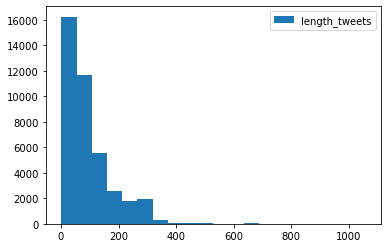

In [16]:
length_df_sml = df_sml['tweet'].str.len()

plt.hist(length_df_sml, bins=20, label="length_tweets")
plt.legend()
plt.show()

tweet is the text.
Most of the tweets are short, there is a definate skew.


In [17]:
#How many unique values are in this column?

df_sml.username.nunique()

13175

               retweets_count  likes_count
username                                  
005e5n                      4           14
007richierich               0            0
00913hee                    0            0
02jv_r                      0            0
064rrr                      0            0
...                       ...          ...
zxxchariou                  0            0
zylbersztajn                0            0
zystral                     0            0
zytgst                      0            1
zzzzeeeeeee                 4           18

[13175 rows x 2 columns]


<AxesSubplot:ylabel='username'>

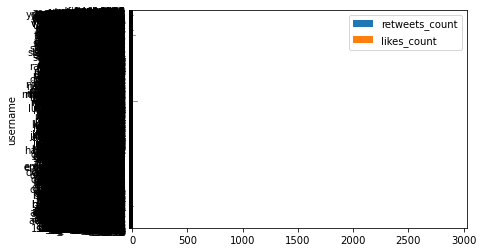

In [18]:
print(df_sml.groupby('username').sum())
df_sml.groupby('username').sum().plot.barh()


## DataCleaning

So, to move forward, I am going to start by:
1. Remove columns that don't add anything at this point (I can always go back to them later)
2. Change the data types that need to be changed (time and date, id numbers etc)
3. The Twitter handles are already masked as @user because of privacy. They don't add anything. 
4. Remove punctuation, numbers and special characters 
5. Remove small words
6. From there, split each tweet into individual words (tokens). 
7. Reduce word forms by stemming, and thus reduce the total number of unique words in our data without losing a significant amount of information.


### Remove @user from the tweet

NB This was a step in a previous analysis where the test and train set were combined to make sure that the data is all cleaned in one effort, but in this case, I only have the one set of data... I wanted to keep the code in case I needed to use it...
'''combi = df_sml
combi.shape
combi'''


In [19]:
# Now to go ahead an remove the '@user' tag
# define the remove @user function

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

df_sml

,date_time,date,time,geo,username,tweet,retweets_count,likes_count
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,0,0
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,0,0
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,0,0
3,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",naseem028,@AnnetteReid247 Right in the throat ðŸ˜­ðŸ˜­ then hit a brainbuster through a table ðŸ˜‚ðŸ˜‚,0,0
4,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",alexlepretre,@Loco_LFC @DanPriceSeattle It's a problem in so many countries. Pretty much every developed country has a market economy and owning property is something that's now out of reach of the working cla...,0,0
...,...,...,...,...,...,...,...,...
40400,2021-01-10 08:32:10,1/10/2021,8:32:10 AM,"51.507322,-0.127647,10km",n_nationalism,@TedBey @EZuelow And it is still available on the wonderful Internet Wayback Machine: https://t.co/vQ1LJqwULG,0,1
40401,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",khloekleo,"I wish I could just delete my socials I donâ€™t even think I need them, however how can I have a job in social media without it",0,0
40402,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",mickiano,Novi and Hakka will continue to see my coin because itâ€™s justified,0,1
40403,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",pcrepairsc,"Do you need a (NO FIX NO FEE) computer service serving Shirley, email info@pcrepairscroydon.com #croydon",0,0


In [20]:
# Now, create a new column tidy_tweet for the cleaned and processed tweets. 
# NB. passed “@[\w]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

df_sml['tidy_tweet'] = np.vectorize(remove_pattern)(df_sml['tweet'], "@[\w]*")
df_sml


<ipython-input-20-2599861cc8b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['tidy_tweet'] = np.vectorize(remove_pattern)(df_sml['tweet'], "@[\w]*")


,date_time,date,time,geo,username,tweet,retweets_count,likes_count,tidy_tweet
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,0,0,Yeah
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,0,0,Indeed. Do you ever sleep
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,0,0,It's 1st October already Time flies
3,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",naseem028,@AnnetteReid247 Right in the throat ðŸ˜­ðŸ˜­ then hit a brainbuster through a table ðŸ˜‚ðŸ˜‚,0,0,Right in the throat ðŸ˜­ðŸ˜­ then hit a brainbuster through a table ðŸ˜‚ðŸ˜‚
4,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",alexlepretre,@Loco_LFC @DanPriceSeattle It's a problem in so many countries. Pretty much every developed country has a market economy and owning property is something that's now out of reach of the working cla...,0,0,It's a problem in so many countries. Pretty much every developed country has a market economy and owning property is something that's now out of reach of the working class. It baffles me that i...
...,...,...,...,...,...,...,...,...,...
40400,2021-01-10 08:32:10,1/10/2021,8:32:10 AM,"51.507322,-0.127647,10km",n_nationalism,@TedBey @EZuelow And it is still available on the wonderful Internet Wayback Machine: https://t.co/vQ1LJqwULG,0,1,And it is still available on the wonderful Internet Wayback Machine: https://t.co/vQ1LJqwULG
40401,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",khloekleo,"I wish I could just delete my socials I donâ€™t even think I need them, however how can I have a job in social media without it",0,0,"I wish I could just delete my socials I donâ€™t even think I need them, however how can I have a job in social media without it"
40402,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",mickiano,Novi and Hakka will continue to see my coin because itâ€™s justified,0,1,Novi and Hakka will continue to see my coin because itâ€™s justified
40403,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",pcrepairsc,"Do you need a (NO FIX NO FEE) computer service serving Shirley, email info@pcrepairscroydon.com #croydon",0,0,"Do you need a (NO FIX NO FEE) computer service serving Shirley, email info.com #croydon"


### Remove punctuation, numbers and special characters

In [21]:
# Remove special characters, numbers, punctuation

df_sml['tidy_tweet'] = df_sml['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True )
df_sml

<ipython-input-21-a1131e95e9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['tidy_tweet'] = df_sml['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True )


,date_time,date,time,geo,username,tweet,retweets_count,likes_count,tidy_tweet
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,0,0,Yeah
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,0,0,Indeed Do you ever sleep
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,0,0,It s st October already Time flies
3,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",naseem028,@AnnetteReid247 Right in the throat ðŸ˜­ðŸ˜­ then hit a brainbuster through a table ðŸ˜‚ðŸ˜‚,0,0,Right in the throat then hit a brainbuster through a table
4,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",alexlepretre,@Loco_LFC @DanPriceSeattle It's a problem in so many countries. Pretty much every developed country has a market economy and owning property is something that's now out of reach of the working cla...,0,0,It s a problem in so many countries Pretty much every developed country has a market economy and owning property is something that s now out of reach of the working class It baffles me that i...
...,...,...,...,...,...,...,...,...,...
40400,2021-01-10 08:32:10,1/10/2021,8:32:10 AM,"51.507322,-0.127647,10km",n_nationalism,@TedBey @EZuelow And it is still available on the wonderful Internet Wayback Machine: https://t.co/vQ1LJqwULG,0,1,And it is still available on the wonderful Internet Wayback Machine https t co vQ LJqwULG
40401,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",khloekleo,"I wish I could just delete my socials I donâ€™t even think I need them, however how can I have a job in social media without it",0,0,I wish I could just delete my socials I don t even think I need them however how can I have a job in social media without it
40402,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",mickiano,Novi and Hakka will continue to see my coin because itâ€™s justified,0,1,Novi and Hakka will continue to see my coin because it s justified
40403,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",pcrepairsc,"Do you need a (NO FIX NO FEE) computer service serving Shirley, email info@pcrepairscroydon.com #croydon",0,0,Do you need a NO FIX NO FEE computer service serving Shirley email info com #croydon


## Remove Short Words

In [22]:
# Removing all words with three characters or less

df_sml['tidy_tweet'] = df_sml['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_sml

<ipython-input-22-d6a423005c24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['tidy_tweet'] = df_sml['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


,date_time,date,time,geo,username,tweet,retweets_count,likes_count,tidy_tweet
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,0,0,Yeah
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,0,0,Indeed ever sleep
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,0,0,October already Time flies
3,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",naseem028,@AnnetteReid247 Right in the throat ðŸ˜­ðŸ˜­ then hit a brainbuster through a table ðŸ˜‚ðŸ˜‚,0,0,Right throat then brainbuster through table
4,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",alexlepretre,@Loco_LFC @DanPriceSeattle It's a problem in so many countries. Pretty much every developed country has a market economy and owning property is something that's now out of reach of the working cla...,0,0,problem many countries Pretty much every developed country market economy owning property something that reach working class baffles that this world opulence something basic housing hard come
...,...,...,...,...,...,...,...,...,...
40400,2021-01-10 08:32:10,1/10/2021,8:32:10 AM,"51.507322,-0.127647,10km",n_nationalism,@TedBey @EZuelow And it is still available on the wonderful Internet Wayback Machine: https://t.co/vQ1LJqwULG,0,1,still available wonderful Internet Wayback Machine https LJqwULG
40401,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",khloekleo,"I wish I could just delete my socials I donâ€™t even think I need them, however how can I have a job in social media without it",0,0,wish could just delete socials even think need them however have social media without
40402,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",mickiano,Novi and Hakka will continue to see my coin because itâ€™s justified,0,1,Novi Hakka will continue coin because justified
40403,2021-01-10 08:32:09,1/10/2021,8:32:09 AM,"51.507322,-0.127647,10km",pcrepairsc,"Do you need a (NO FIX NO FEE) computer service serving Shirley, email info@pcrepairscroydon.com #croydon",0,0,need computer service serving Shirley email info #croydon


## Text Normalisation

Normalising text reduces its randomness and brings the text closer to a 'standard' and reduces the amount of information the computer has to deal with. Normalising reduces inflectional forms to a common base. 

## Tokenisation

In [23]:
tokenized_tweet = df_sml['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                                                                                                                                                                     [Yeah]
1                                                                                                                                                                                      [Indeed, ever, sleep]
2                                                                                                                                                                            [October, already, Time, flies]
3                                                                                                                                                         [Right, throat, then, brainbuster, through, table]
4    [problem, many, countries, Pretty, much, every, developed, country, market, economy, owning, property, something, that, reach, working, class, baffles, that, this, world, opul

## Stemming

In [24]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                                                                                                                                                                                               [yeah]
1                                                                                                                                                                                  [inde, ever, sleep]
2                                                                                                                                                                          [octob, alreadi, time, fli]
3                                                                                                                                                      [right, throat, then, brainbust, through, tabl]
4    [problem, mani, countri, pretti, much, everi, develop, countri, market, economi, own, properti, someth, that, reach, work, class, baffl, that, thi, world, opul, someth, basic, hous, hard, come]
Name:

Now, to stick them back together...

In [25]:
stemmed_tweet = tokenized_tweet.apply(lambda x: ' '.join(x))
# stemmed_tweet.head()
df_sml['stemmed_tweet'] = stemmed_tweet
df_sml.head(5)

<ipython-input-25-1bda00fd4854>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['stemmed_tweet'] = stemmed_tweet


,date_time,date,time,geo,username,tweet,retweets_count,likes_count,tidy_tweet,stemmed_tweet
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,0,0,Yeah,yeah
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,0,0,Indeed ever sleep,inde ever sleep
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,0,0,October already Time flies,octob alreadi time fli
3,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",naseem028,@AnnetteReid247 Right in the throat ðŸ˜­ðŸ˜­ then hit a brainbuster through a table ðŸ˜‚ðŸ˜‚,0,0,Right throat then brainbuster through table,right throat then brainbust through tabl
4,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",alexlepretre,@Loco_LFC @DanPriceSeattle It's a problem in so many countries. Pretty much every developed country has a market economy and owning property is something that's now out of reach of the working cla...,0,0,problem many countries Pretty much every developed country market economy owning property something that reach working class baffles that this world opulence something basic housing hard come,problem mani countri pretti much everi develop countri market economi own properti someth that reach work class baffl that thi world opul someth basic hous hard come


In [26]:
# Continue to clean the text by removing any remaining characters and converting to lower case

import re

def clean_text(tidy_tweet):
    #Remove RT
    tidy_tweet = re.sub(r'RT', '', tidy_tweet)
    
    #Fix &
    tidy_tweet = re.sub(r'&amp;', '&', tidy_tweet)
    
    #Remove punctuations
    tidy_tweet = re.sub(r'[?!.;:,#@-]', '', tidy_tweet)

    #Convert to lowercase to maintain consistency
    tidy_tweet = tidy_tweet.lower()
    return tidy_tweet

## Further Data Exploration

1. Look at time distribution of tweets
2. Look at statistics around user ids of original tweeters
3. Look at statistics around those who reply
4. Look at geolocation of tweets

In [27]:
df_sml.head(3)

,date_time,date,time,geo,username,tweet,retweets_count,likes_count,tidy_tweet,stemmed_tweet
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,0,0,Yeah,yeah
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,0,0,Indeed ever sleep,inde ever sleep
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,0,0,October already Time flies,octob alreadi time fli


In [28]:
df_sml.columns

Index(['date_time', 'date', 'time', 'geo', 'username', 'tweet',
       'retweets_count', 'likes_count', 'tidy_tweet', 'stemmed_tweet'],
      dtype='object')

Need to merge the date and time columns

In [29]:
# Now, create a new column datetime for the merged datetime. 
 #joining both the columns (First name and last name) with the help of Python str.cat() function
df_sml['datetime'] = df_sml['date'].str.cat(df['time'], sep =" ")
df_sml['datetime'] = pd.to_datetime(df_sml['datetime']) 
df_sml = df_sml[['datetime','date', 'time', 'geo', 'username','tweet','tidy_tweet', 'retweets_count', 'likes_count']]
df_sml.head(3)

<ipython-input-29-2ca91c705cee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['datetime'] = df_sml['date'].str.cat(df['time'], sep =" ")
<ipython-input-29-2ca91c705cee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sml['datetime'] = pd.to_datetime(df_sml['datetime'])


,datetime,date,time,geo,username,tweet,tidy_tweet,retweets_count,likes_count
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,Yeah,0,0
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,Indeed ever sleep,0,0
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,October already Time flies,0,0


In [30]:
df_sml.dtypes

datetime          datetime64[ns]
date                      object
time                      object
geo                       object
username                  object
tweet                     object
tidy_tweet                object
retweets_count             int64
likes_count                int64
dtype: object

## Visualisation and understanding the story behind the tweets

This is part of the data exploration and visualisation. Some fo the quesitons we may want to ask include things like: 
    1. What words are most common
    2. What words are most common for negative and positive tweets, respectively?
    3. How many hashtags in a tweet?
    4. What are the trends in the data?
    5. Which of the trends are associated with sentiments, positive and negative? Are they compatible with the sentiments?

### Wordcloud plot

In [31]:
def gen_freq(tweet):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in tweet.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(df_sml.tweet.str)

the                        12009
to                          9828
a                           8685
I                           6780
and                         6722
                           ...  
publics                        1
@Sanise13                      1
bell.                          1
https://t.co/UiGDQ4N4Yf        1
GrosðŸ¤£!                      1
Length: 116483, dtype: int64

In [32]:
all_words = ' '.join([text for text in df_sml['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object

### Stop words Removal
WordCloud provides its own stopwords list. You can have a look at it by-

In [33]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'after', 'that', 'then', 'while', 'an', "you'll", "i'd", 'during', "weren't", 'or', 'as', "it's", 'here', 'did', 'against', 'in', "you've", "they'll", "haven't", 'same', 'being', "that's", 'who', 'had', 'her', 'no', 'few', 'at', 'again', 'own', 'all', 'cannot', "can't", "he's", 'just', 'ought', "i'm", 'ourselves', 'which', "you'd", 'once', 'most', 'would', 'be', 'on', 'can', "isn't", 'they', 'i', "aren't", 'to', 'ours', 'however', 'this', 'more', "won't", "they're", 'because', "we're", "i've", 'doing', "shouldn't", 'further', "i'll", 'myself', 'yourself', 'have', "doesn't", 'other', 'www', 'their', "we'll", 'ever', 'we', 'hence', 'not', "what's", 'when', 'your', 'otherwise', 'a', 'herself', "how's", 'like', 'than', "we've", "wouldn't", 'are', "who's", 'me', 'before', 'out', 'r', 'if', "mustn't", "hadn't", 'below', 'these', 'do', "why's", 'any', "didn't", 'so', 'up', 'yours', "he'll", 'therefore', 'k', 'his', 'such', 'you', 'get', 'but', 'does', 'only', 'under', 'from', 'he', 'of', 'he

Now that you know what all has to be changed to improve our word cloud, let's make some wordclouds.

We'll call the previous functions of clean_text() and gen_freq() to perform cleaning and frequency computation operation respectively and drop the words present in STOPWORDS from the word_freq dictionary.

In [34]:
tweet = df_sml.tweet.apply(lambda x: clean_text(x))
word_freq = gen_freq(tweet.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='black').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object

In [35]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [36]:

# extracting hashtags
HT_regular = hashtag_extract(df_sml['tidy_tweet'])

# unnesting list
HT_regular = sum(HT_regular,[])


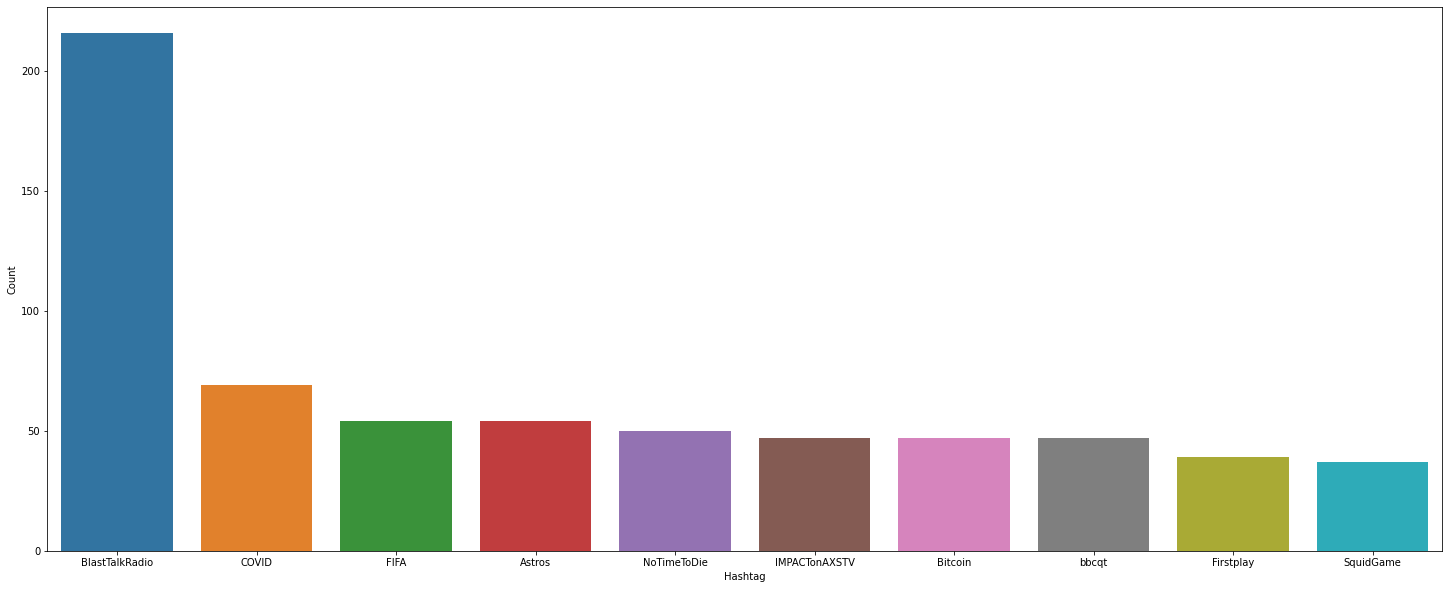

In [37]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(25,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# Jupyter Notebooks and CONSTELLATION
To begin with, to send data to CONSTELLATION to create and modify graphs. 

MAKE SURE CONSTELLATION IS RUNNING

start the external scripting server (this will already be running if the Jupyter notebook server was started from CONSTELLATION). 

The external scripting server makes a REST HTTP API available for use by any HTTP client.


In [38]:
import io
import os
import pandas as pd
import PIL.Image, PIL.ImageDraw, PIL.ImageFilter, PIL.ImageFont

# Also import some of the notebook display methods so we can display nice things.
#
from IPython.display import display, HTML, Image

# This is a convenient Python interface to the REST API.
#
import constellation_client

In [39]:
cc = constellation_client.Constellation()

When started, the external scripting server automatically downloaded constellation_client.py to the .ipython directory. NOTE: It's also important that you create a client instance after you start the REST server, because the server creates a secret that the client needs to know to communicate with the server.

After the import succeeds, we then create a Python object that communicates with CONSTELLATION on our behalf. CONSTELLATION provides communication with the outside world using HTTP (as if it were a web server) and JSON (a common data format). The constellation_client library hides these details so you can just use Python.

### Load data to CONSTELLATION
From a csv file, utilising  io.StringIO 

In [40]:
''' csv_data = 
from_address,from_country,to_address,to_country,dtg
abc@example1.com,Brazil,def@example2.com,India,2017-01-01 12:34:56
abc@example1.com,Brazil,ghi@example3.com,Zambia,2017-01-01 14:30:00
jkl@example4.com,India
.strip()''' 

# df_sml = pd.read_csv(io.StringIO(csv_data))
df_sml.head(3)

,datetime,date,time,geo,username,tweet,tidy_tweet,retweets_count,likes_count
0,2021-01-10 11:06:23,1/10/2021,11:06:23 AM,"51.507322,-0.127647,10km",nahhhman,@itismedaphne @eikuobaj Yeah,Yeah,0,0
1,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",matthew83862519,@SeoirseDuffy_ Indeed. Do you ever sleep,Indeed ever sleep,0,0
2,2021-01-10 11:06:21,1/10/2021,11:06:21 AM,"51.507322,-0.127647,10km",mohsadiq16,It's 1st October already Time flies,October already Time flies,0,0


Putting our data in a dataframe is a good idea; not only can we easily manipulate it, but it's easy to send a dataframe to CONSTELLATION, as long as we tell CONSTELLATION what data belongs where.

A dataframe is a table of data, but CONSTELLATION deals with graphs, so we need to reconcile a data table and a graph. 

A row of data in the dataframe is a TRANSACTION: the source node has the "from" attributes, the destination node has the "to" attributes, and the transaction has the dtg attribute. 


In [41]:
df_sml.dtypes

datetime          datetime64[ns]
date                      object
time                      object
geo                       object
username                  object
tweet                     object
tidy_tweet                object
retweets_count             int64
likes_count                int64
dtype: object

All of the columns are of type object, which in this case means "string". However, CONSTELLATION expects datetimes to actually be of datetime type; if we try and upload datetimes as strings, CONSTELLATION won't recognise them as datetimes.

Note the pandas fix is below, but not used....

In [42]:
'''df_sml.dtg = pd.to_datetime(df_sml.dtg)
df_sml'''

'df_sml.dtg = pd.to_datetime(df_sml.dtg)\ndf_sml'

The datetime64[ns] type means that datetime is now a datetime column.

CONSTELLATION recognises source, destination and transaction attributes by the prefixes of their names. It won't be too surprising to find out that the prefixes are source, destination, and transaction, with a . separating the prefixes from the attribute names.

Let's rename the columns to match what CONSTELLATION expects. (We didn't do this first because the column headers were valid Python identifiers, it was easier to type df.dtg than df['transaction.DateTime'].)

Note that we use the name Identifier for the values that uniquely identify a particular node.

In [43]:
'''df_sml = df_sml.rename(columns={
    'from_address': 'source.Label',
    'from_country': 'source.Geo.Country',
    'to_address': 'destination.Label',
    'to_country': 'destination.Geo.Country',
    'dtg': 'transaction.DateTime'})
df_sml'''

"df_sml = df_sml.rename(columns={\n    'from_address': 'source.Label',\n    'from_country': 'source.Geo.Country',\n    'to_address': 'destination.Label',\n    'to_country': 'destination.Geo.Country',\n    'dtg': 'transaction.DateTime'})\ndf_sml"

Now the dataframe is ready to be sent to CONSTELLATION. We'll create a new graph (using the new_graph() method), and send the dataframe to CONSTELLATION using the put_dataframe() method.

If you get a Python ConnectionRefusedError when you run this cell, you've probably forgotten to start the CONSTELLATION external scripting server in the Tools menu. If you start it now, you'll have to go back and re-execute the "cc = constellation_client.Constellation()" cell, then come back here.)

In [44]:
cc.new_graph()
cc.put_dataframe(df_sml)

ConnectionError: HTTPConnectionPool(host='localhost', port=1517): Max retries exceeded with url: /v1/graph/new (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000170189E2580>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

CONSTELLATION creates a new graph, accepts the contents of the dataframe, applies the schema, and automatically arranges the graph. Finally, it resets the view so you can see the complete graph.

In this simple case, it's easy to see that the first two rows of the dataframe are correctly represented as nodes with transactions between them. The third row of the dataframe does not have a destination, so there is no transaction.

If you open the Attribute Editor view and select a transaction, you'll see that they have the correct DateTime values.

Of course, we didn't have to create a new graph. In the same graph, let's add a new node with a transaction from an existing node (ghi@example3.com). We'll use another (pretend) CSV file and modify the dataframe as we did before.

In [ ]:
csv_data = '''
from_address,from_country,to_address,to_country,dtg
ghi@example3.com,Zambia,mno@example3.com,Brazil,2017-01-02 01:22:33
'''.strip()
dfn = pd.read_csv(io.StringIO(csv_data))
dfn.from_address = dfn.from_address + '<Email>'
dfn.to_address = dfn.to_address + '<Email>'
dfn.dtg = pd.to_datetime(dfn.dtg)
dfn = dfn.rename(columns={
    'from_address': 'source.Label',
    'from_country': 'source.Geo.Country',
    'to_address': 'destination.Label',
    'to_country': 'destination.Geo.Country',
    'dtg': 'transaction.DateTime'})
cc.put_dataframe(dfn)

## Extracting Features

In [45]:
# !pip install gensim

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

## Bag of Words

Bag of Wrods is a bit like 'one hot encoding' in that it represents words with numbers. If a corpus is the collection of tweets (C=corpus D=documents (or in this case tweets), and the number of tokens taken from the corpus is N, then the size of the matrix resulting from the list of tokens of length N is given by DXN. Each row in the matrix M has the frequency of the tokens in document D(i).

For example: Suppose we have only 2 tweets:

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The list of the unique tokens in the corpus C = [‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –

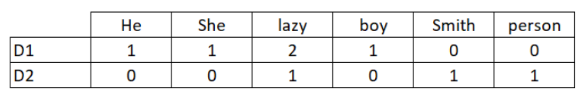

The columns of which can now be used for a classification model. 
The CountVectorizer function can be used here to  make Bag-of-Words features. 
Set the parameter max_features = 1000 to select the top 1000 terms ordered by term frequency across the corpus.

In [46]:
import sklearn

from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_sml['tidy_tweet'])

bow

<40405x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 100439 stored elements in Compressed Sparse Row format>

## TF-IDF Features

This method is based on the frequency method, but differs from the bag of words method by accounting for, not only the frequency of the word in a tweet, but also the frequency of the words overall (in the whole corpus). 
If a word occurs frequently, it is 'penalised' with a lower weighting than words that appear often in a number of the tweets but rarely in the overall corpus.

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_sml['tidy_tweet'])

## Word Embeddings

### 1. Word2Vec Embeddings

In [48]:
tokenized_tweet = df_sml['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(df_sml['tidy_tweet']), epochs=20)

(4777799, 5756960)

In [49]:
model_w2v.wv.most_similar(positive="dinner")

[('crockpot', 0.655844509601593),
 ('Screaming', 0.5819122195243835),
 ('Flies', 0.5806329250335693),
 ('preparing', 0.5804961919784546),
 ('Mummy', 0.579712986946106),
 ('Lancaster', 0.5782908201217651),
 ('Connery', 0.5782685279846191),
 ('chop', 0.5759478807449341),
 ('faux', 0.574292778968811),
 ('Bearcat', 0.5711640119552612)]

In [50]:
model_w2v.wv.most_similar(positive="trump")

[('republicans', 0.9317442178726196),
 ('americans', 0.8711092472076416),
 ('ferrari', 0.8364393711090088),
 ('tale', 0.8333368301391602),
 ('Sikhs', 0.8195956349372864),
 ('Educating', 0.8058455586433411),
 ('Afghans', 0.7902904152870178),
 ('vinegar', 0.7901318669319153),
 ('piglet', 0.7889848947525024),
 ('sharia', 0.7885619401931763)]

In [51]:
model_w2v.wv['food']

array([ 8.13714325e-01, -7.64516532e-01,  7.64464974e-01,  4.25619960e-01,
       -1.67057902e-01,  3.51565868e-01,  4.24442850e-02, -3.48829895e-01,
       -2.70383316e-03, -4.93616253e-01, -1.33860065e-02, -6.08582973e-01,
       -7.18831182e-01,  9.60241929e-02, -2.69960761e-01, -4.13465321e-01,
       -2.90400445e-01, -1.53395787e-01, -2.15953022e-01, -6.72531068e-01,
        8.68364796e-02,  2.08803788e-01, -7.23160386e-01,  1.07459910e-01,
       -3.59759182e-01,  1.77597940e-01,  1.81273952e-01, -2.20030144e-01,
       -9.27934274e-02,  2.20013306e-01,  3.11201423e-01,  6.66519523e-01,
       -4.16978598e-01, -7.10355192e-02, -7.43463397e-01,  2.38581851e-01,
        3.61011356e-01,  8.34109724e-01, -9.90365446e-02,  1.06455617e-01,
        4.63116288e-01, -4.36998099e-01,  6.39319867e-02,  2.81265944e-01,
        3.87377366e-02,  2.76772201e-01,  7.72098839e-01,  6.09068930e-01,
        4.61884141e-02, -4.07883763e-01, -1.48014100e-02,  2.04238921e-01,
       -2.26732031e-01,  

In [52]:
len(model_w2v.wv['food']) #The length of the vector is 200

200

## Preparing Vectors for Tweets

convert processed text to numeric feature vectors in order to be able to feed it to computers for analysis.

In [53]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [54]:
# Preparing word2vec feature set...

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(40405, 200)

## 2. Doc2Vec Embedding

In [55]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.



In [56]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets


Check to see if working

In [57]:
labeled_tweets[:5]


[TaggedDocument(words=['Yeah'], tags=['tweet_0']),
 TaggedDocument(words=['Indeed', 'ever', 'sleep'], tags=['tweet_1']),
 TaggedDocument(words=['October', 'already', 'Time', 'flies'], tags=['tweet_2']),
 TaggedDocument(words=['Right', 'throat', 'then', 'brainbuster', 'through', 'table'], tags=['tweet_3']),
 TaggedDocument(words=['problem', 'many', 'countries', 'Pretty', 'much', 'every', 'developed', 'country', 'market', 'economy', 'owning', 'property', 'something', 'that', 'reach', 'working', 'class', 'baffles', 'that', 'this', 'world', 'opulence', 'something', 'basic', 'housing', 'hard', 'come'], tags=['tweet_4'])]

# Model Building Sentiment Analysis

The Pre modelling stages are complete, these have prepared our data so that it is the correct form and shape.
The next step is to build the predictive models, using our prepared dataet and the two feature set Bag of Wrods and TF-IDF.
Now we will be building predictive models on the dataset using the two feature set — Bag-of-Words and TF-IDF.

In order to predict the probability of an occurance of an event we will use logistic regression for the models. 
This will fit the data to a logit function. 

The Logistic Regression equation is:


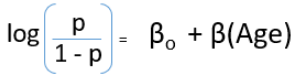 
    
    
   
    
    
    
    

## Training a Doc 2 Vec model

Now lets call to train the model. This may take some time to run, a number will show int he ln[] box on the left when its done.

In [58]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

100%|███████████████████████████████████████████████████████████████████████| 40405/40405 [00:00<00:00, 4044360.86it/s]


In [59]:
model_d2v.train(labeled_tweets, total_examples= len(df_sml['tidy_tweet']), epochs=15)

### Preparing doc2vec Feature Set

In [60]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(df_sml)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(40405, 200)

## Using Bag of Words Features

Building a model using logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

NameError: name 'train' is not defined

This step trained the logistic regression model on the features from the bag of words.
The Output number listed below the window is the F1-score, a score of 0.501 for the validation set. 

Now we will use this model to predict for the test data.

In [62]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

NameError: name 'lreg' is not defined

## Building the model using the TF-IDF features

In [63]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

NameError: name 'ytrain' is not defined

The validation score is 0.5009. So, by using the TF-IDF features, the validation score has improved very slightly.

## End Notes:

This workbook steps through a sentiment analysis problem using a dataset of tweets that have already been collected. 
The first steps were data preprocessing and exploration.
Then features were extracted from the cleaned text using Bag-of-Words and TF-IDF. 
To finish we steped through building a couple of models using both the feature sets to classify the tweets.

## References and Sources

I have heavily borrowed from Daniel Johnstone's tutorial notebooks, both for Constellation and Python for Data Analysts. I have kep the comments he included so that I remember when everything is. 


Hate speech detection: Challenges and solutions
Sean MacAvaney ,Hao-Ren Yao,Eugene Yang,Katina Russell,Nazli Goharian,Ophir Frieder
Published: August 20, 2019
https://doi.org/10.1371/journal.pone.0221152

@inproceedings{gibert2018hate,
    title = "{Hate Speech Dataset from a White Supremacy Forum}",
    author = "de Gibert, Ona  and
      Perez, Naiara  and
      Garc{\'\i}a-Pablos, Aitor  and
      Cuadros, Montse",
    booktitle = "Proceedings of the 2nd Workshop on Abusive Language Online ({ALW}2)",
    month = oct,
    year = "2018",
    address = "Brussels, Belgium",
    publisher = "Association for Computational Linguistics",
    url = "https://www.aclweb.org/anthology/W18-5102",
    doi = "10.18653/v1/W18-5102",
    pages = "11--20",
}